In [10]:
import cv2
from skimage.data import astronaut
import numpy as np

In [11]:
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')

filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])

src: 이미지

ddepth: 이미지 깊이(자료형 크기). -1이면 입력과 동일

kernel: 커널 행렬

커널 크기가 커지면서 이미지가 점점 더 흐려짐

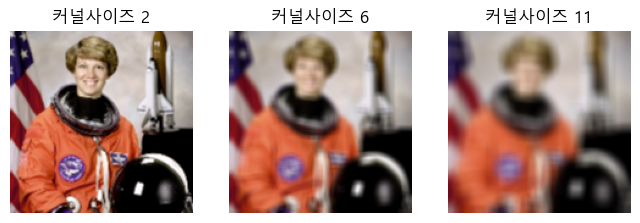

In [18]:
img = astronaut()
img = cv2.resize(img, dsize=(150, 150))

plt.figure(figsize=(8,3))
for i, k in enumerate([2,6,11]):
    kernel = np.ones((k,k)) / k**2
    filtering = cv2.filter2D(img, -1, kernel)
    plt.subplot(1, 3, i+1)
    plt.imshow(filtering)
    plt.title("커널사이즈 {}".format(k))
    plt.axis('off')
    
plt.show()

블러

blur(src, ksize)

src: 원본 이미지

ksize: 커널 크기

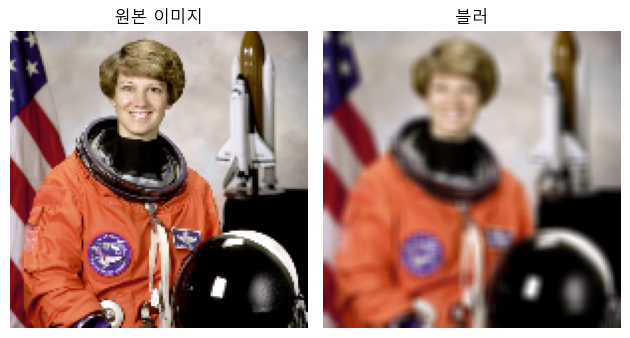

In [24]:
blur = cv2.blur(img, (5,5))
boxfilter = cv2.boxFilter(img, -1, (5, 5))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("원본 이미지")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(blur)
plt.title('블러')
plt.axis('off')

plt.tight_layout()
plt.show()

중앙값 블러

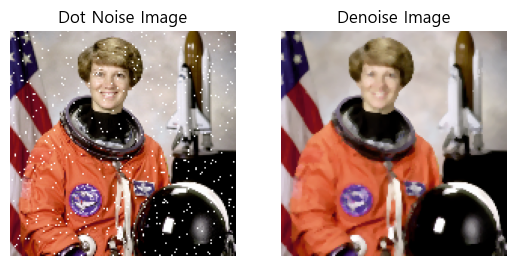

In [26]:
img_noise = img.copy()

np.random.seed(0)
N =500
idx1 = np.random.randint(img.shape[0], size=N)
idx2 = np.random.randint(img.shape[1], size=N)
img_noise[idx1, idx2] = 255

img_denoise = cv2.medianBlur(img_noise, 3)

plt.subplot(1,2,1)
plt.imshow(img_noise)
plt.title("Dot Noise Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_denoise)
plt.title("Denoise Image")
plt.axis('off')

plt.show()

가우시안 블러

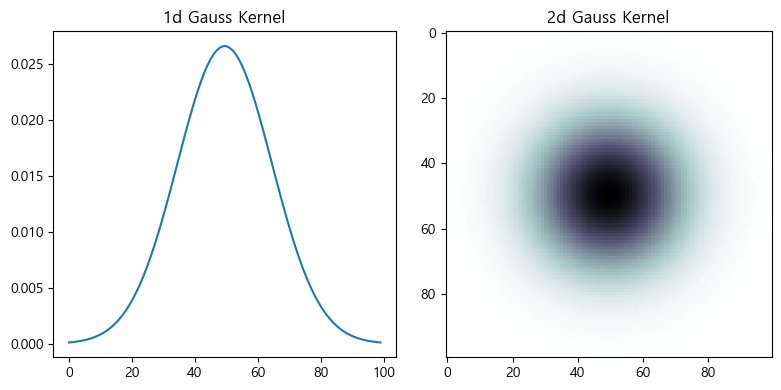

In [35]:
gauss1d = cv2.getGaussianKernel(100,15)
gauss2d = gauss1d @ gauss1d.T

plt.figure(figsize=(8,4))

plt.subplot(121)
plt.plot(gauss1d)
plt.grid(False)
plt.title("1d Gauss Kernel")

plt.subplot(122)
plt.imshow(gauss2d, cmap=plt.cm.bone_r)
plt.grid(False)
plt.title('2d Gauss Kernel')

plt.tight_layout()
plt.show()